In [46]:
#Project: Employee Salary Analysis Across Job Roles 🚀
#I'm thrilled to present my  project, which focuses on analyzing employee salaries for different job roles across various industries and regions. 
# This project is a comprehensive exploration of salary trends, designed to provide actionable insights for HR professionals, data scientists, and decision-makers.



In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("C:/Users/Merna Ahmed/Downloads/ds_salaries.xlsx")
print(data)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [49]:
data.shape

(607, 12)

In [50]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [51]:
data.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [52]:
data.duplicated().sum()

np.int64(0)

In [53]:
data.sample(15)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
302,302,2022,SE,FT,Data Scientist,146000,USD,146000,US,100,US,M
37,37,2020,EN,FT,Machine Learning Engineer,250000,USD,250000,US,50,US,L
233,233,2021,SE,FT,Data Analyst,200000,USD,200000,US,100,US,L
28,28,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
444,444,2022,SE,FT,Data Scientist,215300,USD,215300,US,0,US,L
384,384,2022,EX,FT,Head of Machine Learning,6000000,INR,79039,IN,50,IN,L
79,79,2021,EN,FT,Data Analyst,80000,USD,80000,US,100,US,M
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S
82,82,2021,MI,FT,Applied Data Scientist,68000,CAD,54238,GB,50,CA,L


In [54]:
#Understanding the correlation between company size and employee salaries.
size_mapping = {'S': 1, 'M': 2, 'L': 3}
data['company_size'] = data['company_size'].map(size_mapping)

# Calculate the correlation
correlation_matrix = data[['company_size', 'salary']].corr()
correlation_value = correlation_matrix.loc['company_size', 'salary']
print("Correlation between company size and salary:", correlation_value)
data[['company_size','salary']].corr

Correlation between company size and salary: 0.07995913742660098


<bound method DataFrame.corr of      company_size  salary
0               3   70000
1               1  260000
2               2   85000
3               1   20000
4               3  150000
..            ...     ...
602             2  154000
603             2  126000
604             2  129000
605             2  150000
606             3  200000

[607 rows x 2 columns]>

In [55]:
#The relationship between company size and salary 
data[['company_size', 'salary']].corr()

,company_size,salary
company_size,1.000000,0.079959
salary,0.079959,1.000000


In [56]:
data[['employment_type', 'salary']].value_counts()

employment_type  salary
FT               80000     18
                 120000    15
                 100000    15
                 60000     14
                 150000    14
                           ..
                 25000      1
                 28500      1
                 72500      1
                 31000      1
PT               400000     1
Name: count, Length: 282, dtype: int64

In [57]:
#Comparing salary levels between full-time and part-time employment
salary_state=data.groupby('employment_type')['salary'].describe()
print (salary_state)

                 count           mean           std      min       25%  \
employment_type                                                          
CT                 5.0  184000.000000  1.569570e+05  29000.0  100000.0   
FL                 4.0   48000.000000  4.052982e+04  12000.0   18000.0   
FT               588.0  331124.622449  1.568478e+06   4000.0   70000.0   
PT                10.0   85476.000000  1.230363e+05   8760.0   12500.0   

                      50%       75%         max  
employment_type                                  
CT               105000.0  270000.0    416000.0  
FL                40000.0   70000.0    100000.0  
FT               115250.0  165000.0  30400000.0  
PT                34500.0   89750.0    400000.0  


In [58]:
data['employment_type'].value_counts()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

In [59]:
# number of jobs as per job title categorised by employment type

data.groupby('employment_type')['job_title'].value_counts().to_frame()

count
employment_type job_title                                
CT              Applied Machine Learning Scientist      1
                Business Data Analyst                   1
                ML Engineer                             1
                Principal Data Scientist                1
                Staff Data Scientist                    1
...                                                   ...
PT              Data Scientist                          2
                3D Computer Vision Researcher           1
                Computer Vision Engineer                1
                Data Analyst                            1
                ML Engineer                             1

[64 rows x 1 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

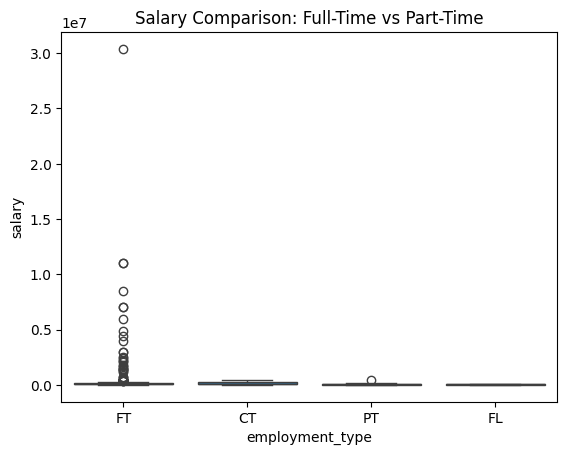

In [60]:
sns.boxplot(x='employment_type',y ='salary', data=data)
plt.title('Salary Comparison: Full-Time vs Part-Time')
plt.xlabel('employment_type')
plt.ylabel('salary')
plt.show

In [61]:
#Analyzing salary trends across different job titles and experience levels
salary_trend=data.groupby(['job_title','experience_level'])['salary'].describe()
salary_trend

count           mean  \
job_title                     experience_level                         
3D Computer Vision Researcher MI                  1.0  400000.000000   
AI Scientist                  EN                  4.0  414750.000000   
                              MI                  2.0  160000.000000   
                              SE                  1.0   55000.000000   
Analytics Engineer            EX                  2.0  155000.000000   
...                                               ...            ...   
Product Data Analyst          MI                  2.0  235000.000000   
Research Scientist            EN                  4.0   80500.000000   
                              MI                  7.0  142142.714286   
                              SE                  5.0   90180.000000   
Staff Data Scientist          SE                  1.0  105000.000000   

                                                          std       min  \
job_title                     experience_level                            
3D Computer Vision Researcher MI                          NaN  400000.0   
AI Scientist                  EN                628342.462356   12000.0   
                              MI                 56568.542495  120000.0   
                              SE                          NaN   55000.0   
Analytics Engineer            EX                 28284.271247  135000.0   
...                                                       ...       ...   
Product Data Analyst          MI                304055.915910   20000.0   
Research Scientist            EN                 35791.060336   42000.0   
                              MI                150658.002016   48000.0   
                              SE                 41716.447596   50000.0   
Staff Data Scientist          SE                          NaN  105000.0   

                                                     25%       50%       75%  \
job_title                     experience_level                                 
3D Computer Vision Researcher MI                400000.0  400000.0  400000.0   
AI Scientist                  EN                 12000.0  156000.0  558750.0   
                              MI                140000.0  160000.0  180000.0   
                              SE                 55000.0   55000.0   55000.0   
Analytics Engineer            EX                145000.0  155000.0  165000.0   
...                                                  ...       ...       ...   
Product Data Analyst          MI                127500.0  235000.0  342500.0   
Research Scientist            EN                 55500.0   80000.0  105000.0   
                              MI                 56000.0   69999.0  157500.0   
                              SE                 51400.0   85000.0  120500.0   
Staff Data Scientist          SE                105000.0  105000.0  105000.0   

                                                      max  
job_title                     experience_level             
3D Computer Vision Researcher MI                 400000.0  
AI Scientist                  EN                1335000.0  
                              MI                 200000.0  
                              SE                  55000.0  
Analytics Engineer            EX                 175000.0  
...                                                   ...  
Product Data Analyst          MI                 450000.0  
Research Scientist            EN                 120000.0  
                              MI                 450000.0  
                              SE                 144000.0  
Staff Data Scientist          SE                 105000.0  

[105 rows x 8 columns]

In [62]:
# average salary  per job title

data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

In [63]:
data.groupby('job_title')['salary_in_usd'].head(10)

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
561    184700
590    192564
594    150260
595    109280
606    200000
Name: salary_in_usd, Length: 225, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

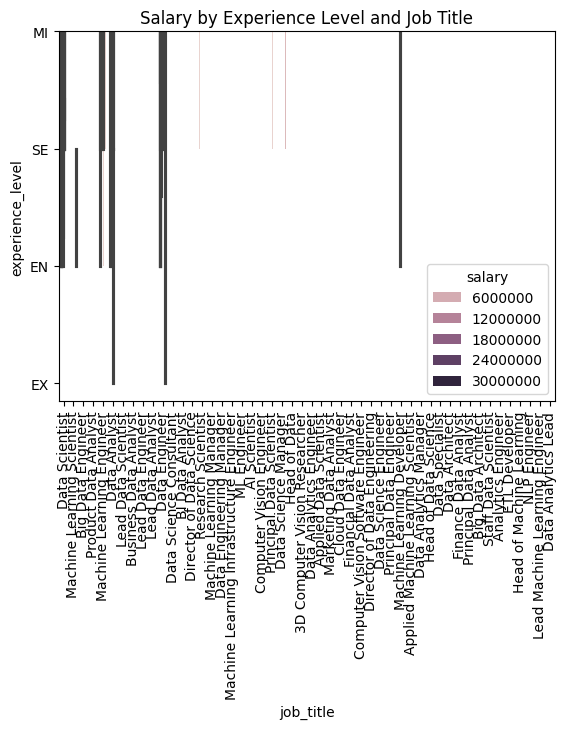

In [64]:
#Analyzing salary trends across different job titles and experience levels
sns.barplot(x='job_title',y='experience_level',hue='salary',data=data)
plt.title('Salary by Experience Level and Job Title')
plt.xticks(rotation=90)
plt.show

In [65]:
#Investigating the impact of remote work on compensation.
data.groupby('remote_ratio')['salary'].describe()

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,127.0,218147.842520,5.595259e+05,4000.0,68300.0,102100.0,162040.0,4900000.0
50,99.0,708018.171717,2.100784e+06,8000.0,52250.0,76760.0,151500.0,11000000.0
100,381.0,259499.902887,1.585939e+06,4000.0,80000.0,123000.0,167000.0,30400000.0


In [66]:
data['salary'].max()

np.int64(30400000)

In [67]:
data.sample()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
453,453,2022,MI,FT,Machine Learning Engineer,120000,USD,120000,US,100,US,1


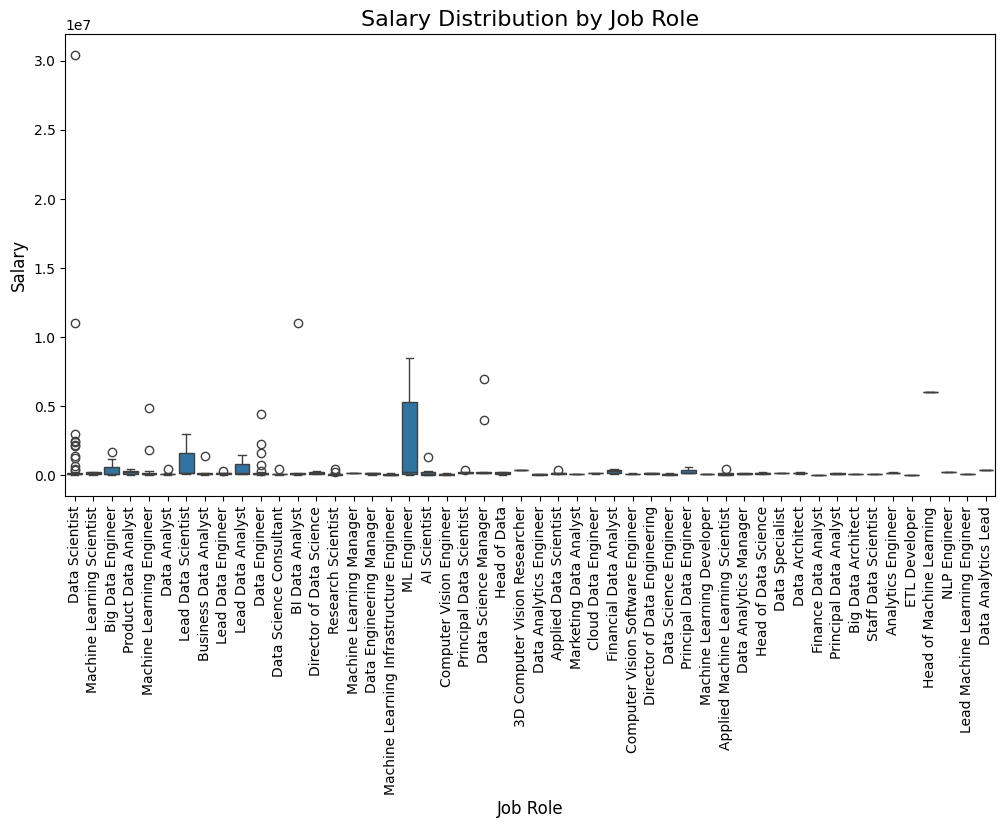

In [68]:
#Boxplot of Employee Salaries Categorized by Job Role
plt.figure(figsize=(12, 6))  
sns.boxplot(data=data, x="job_title", y="salary", legend=False)

plt.title("Salary Distribution by Job Role", fontsize=16)
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=90)  
plt.show()

In [69]:
data['remote_ratio'].value_counts(normalize=True)

remote_ratio
100    0.627677
0      0.209226
50     0.163097
Name: proportion, dtype: float64

In [70]:
data.to_csv('Employee-Salary-Analysis-Across-Job-Roles.csv')
